In [1]:
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python
# more info on random forest https://www.youtube.com/watch?v=RUEFSwN-orQ
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#fix balcony column
# drop columns lattitude longtitude eircode 



In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv('/Users/patrickmoloney/Downloads/data-rental2.csv', na_values = missing_value_formats)

In [3]:
df.head()

,approx,number,address 1,address 2,address 3,eircode,lattitude,longtitude,lattitude eyre square,longtitude eyre square,...,Distance GMIT,number of rooms,number of bathrooms,price per month,type,connection,BER,balcony,floor,heating
0,no,Chaplaincy House,Ballybane Road,Ballybane,NaN,H91 E2NY,53.279666,-9.008728,53.274839,-9.04863,...,0.209452,4,2,2100,house,NaN,d2,no,NaN,central
1,yes,NaN,cappagh road,knocknacarra,NaN,H91 PV0Y,53.271272,-9.132431,53.274839,-9.04863,...,8.135066,1,1,850,apartment,NaN,c1,no,ground,central
2,no,83,Maoilin,Ballymoneen Road,Moneen,H91 A6CH,53.271473,-9.121873,53.274839,-9.04863,...,7.434207,3,2,1800,house,NaN,a3,no,NaN,central
3,no,NaN,NaN,NaN,NaN,H91 W5RP,53.272302,-9.077226,53.274839,-9.04863,...,4.475861,1,1,850,apartment,NaN,NaN,no,ground,central
4,no,NaN,NaN,NaN,NaN,H91 K46R,53.273859,-9.026788,53.274839,-9.04863,...,1.176212,3,2,1600,house,NaN,d1,no,NaN,central


In [4]:
df.isna().sum()


approx                    206
number                    256
address 1                 194
address 2                 237
address 3                 360
eircode                   237
lattitude                   0
longtitude                  0
lattitude eyre square       0
longtitude eyre square      0
Distance Eyre Square        0
latitude salthill           0
longtitude salthill         0
Distance Salthill           0
latitude collage            0
longtitude collage          0
Distance NUIG               0
latitude gmit               0
longtitude gmit             0
Distance GMIT               0
number of rooms             0
number of bathrooms         0
price per month             0
type                        0
connection                265
BER                        14
balcony                     2
floor                     184
heating                     5
dtype: int64

In [5]:
value_list = ['apartment','studio']
df=df[df.type.isin(value_list)]
df.type.unique()

array(['apartment', 'studio'], dtype=object)

In [6]:
df=df.drop(columns='eircode')
df=df.drop(columns='lattitude') 
df=df.drop(columns='longtitude')
df=df.drop(columns='approx')
df=df.drop(columns='number')
df=df.drop(columns='address 1')
df=df.drop(columns='address 2')
df=df.drop(columns='address 3')
df=df.drop(columns='lattitude eyre square')
df=df.drop(columns='longtitude eyre square')
df=df.drop(columns='latitude salthill')
df=df.drop(columns='longtitude salthill')
df=df.drop(columns='latitude collage')
df=df.drop(columns='longtitude collage')
df=df.drop(columns='latitude gmit')
df=df.drop(columns='longtitude gmit')
# thse change depending on the thing we're looking at 
df=df.drop(columns='type') 
df=df.drop(columns='connection') 
#df=df.drop(columns='balcony') 

In [7]:
df.isna().sum()

Distance Eyre Square     0
Distance Salthill        0
Distance NUIG            0
Distance GMIT            0
number of rooms          0
number of bathrooms      0
price per month          0
BER                     11
balcony                  2
floor                   37
heating                  4
dtype: int64

In [8]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,balcony,floor,heating
1,5.586384,4.231058,4.789334,8.135066,1,1,850,c1,no,ground,central
3,1.922237,1.068662,1.296991,4.475861,1,1,850,NaN,no,ground,central
6,1.150220,0.751666,1.333127,3.533139,2,2,1500,c2,yes,second,electric
8,2.864960,4.719189,3.516732,0.914503,1,1,650,e1,no,ground,electric
9,0.837581,2.722612,1.565598,1.831316,2,1,1800,exempt,no,ground,central


In [9]:
#take a look at columns
df.BER.unique() 

array(['c1', nan, 'c2', 'e1', 'exempt', 'e2', 'c3', 'd2', 'd1', 'b3', 'f',
       'b1', 'a3', 'a1', 'g'], dtype=object)

In [10]:
df.heating.unique() 

array(['central', 'electric', nan], dtype=object)

In [11]:
df.balcony.unique()

array(['no', 'yes', nan], dtype=object)

In [12]:
#only ber and heating has missing values 
df = df.dropna() #drop nan values , not removing 'na' values need to fix that 

In [13]:
df.heating.unique()

array(['central', 'electric'], dtype=object)

In [15]:
df.BER.unique()

array(['c1', 'c2', 'e1', 'exempt', 'e2', 'c3', 'd2', 'd1', 'b3', 'b1',
       'f', 'a3', 'a1', 'g'], dtype=object)

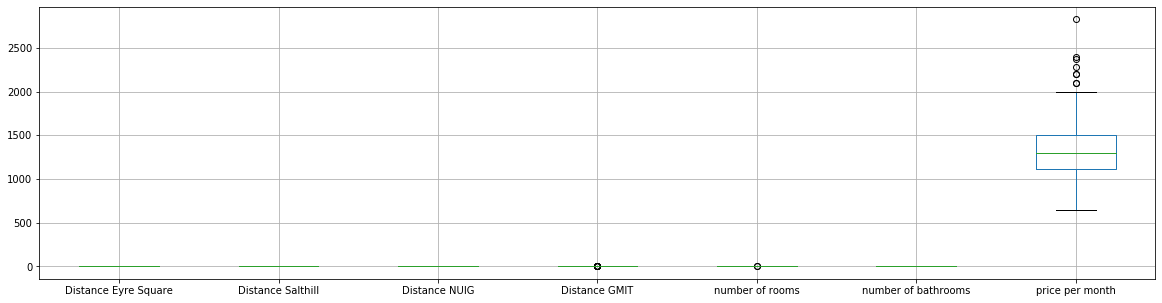

In [16]:
df.boxplot(figsize=(20,5))
plt.show() #outliers, distance from salthill, number of rooms and number of baths, should consider removing those 

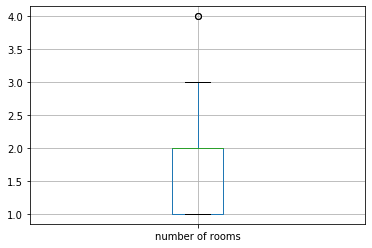

In [17]:
df.boxplot(column='number of rooms')
plt.show()

4 room apartment is showing as an outlier 

In [18]:
df.describe()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2.156983,2.680707,2.307608,3.254004,1.867347,1.484694,1356.693878
std,1.456978,1.817983,1.534960,1.652991,0.634686,0.585964,356.217059
min,0.137772,0.099173,0.325498,0.426744,1.000000,1.000000,650.000000
25%,0.954541,1.239299,1.078918,2.127786,1.000000,1.000000,1116.750000
50%,1.740680,2.260360,1.722920,2.898607,2.000000,1.000000,1300.000000
75%,3.051234,3.716152,3.219318,4.278643,2.000000,2.000000,1500.000000
max,5.586384,7.003994,6.307277,8.135066,4.000000,3.000000,2825.000000


In [19]:
scale_mapper = {
    "a1":15,
    "a2":14,
    "a3":13,
    "b1":12,
    "b2":11,
    "b3":10,
    "c1":9,
    "c2":8,
    "c3":7,
    "d1":6,
    "d2":5,
    "e1":4,
    "e2":3,
    "f":2,
    "g":1,
    "exempt":0
}

df['BER'] = df['BER'].replace(scale_mapper)

df.tail()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,balcony,floor,heating
386,2.638566,4.520756,3.014600,1.751473,1,1,950,10,no,ground,electric
389,0.991533,1.500987,0.327196,3.504046,2,2,2000,7,no,second,central
392,1.398883,0.528898,1.540958,3.739695,1,1,920,4,no,ground,electric
393,5.087938,6.748020,5.912348,2.534640,1,1,810,0,no,first,central
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,5,no,ground,electric


In [20]:
df = pd.get_dummies(df, columns=[ 'balcony','heating'])
df.tail()

#this gives us dummy variables for the categorical columns remaining, for mext run might be worth removing the balcony when examing both

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,floor,balcony_no,balcony_yes,heating_central,heating_electric
386,2.638566,4.520756,3.014600,1.751473,1,1,950,10,ground,1,0,0,1
389,0.991533,1.500987,0.327196,3.504046,2,2,2000,7,second,1,0,1,0
392,1.398883,0.528898,1.540958,3.739695,1,1,920,4,ground,1,0,0,1
393,5.087938,6.748020,5.912348,2.534640,1,1,810,0,first,1,0,1,0
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,5,ground,1,0,0,1


In [21]:
del df['balcony_no']

In [22]:
del df['heating_central']

In [23]:
df.head()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,floor,balcony_yes,heating_electric
1,5.586384,4.231058,4.789334,8.135066,1,1,850,9,ground,0,0
6,1.150220,0.751666,1.333127,3.533139,2,2,1500,8,second,1,1
8,2.864960,4.719189,3.516732,0.914503,1,1,650,4,ground,0,1
9,0.837581,2.722612,1.565598,1.831316,2,1,1800,0,ground,0,0
11,2.946082,4.831689,3.334770,1.808406,1,1,1000,0,ground,0,0


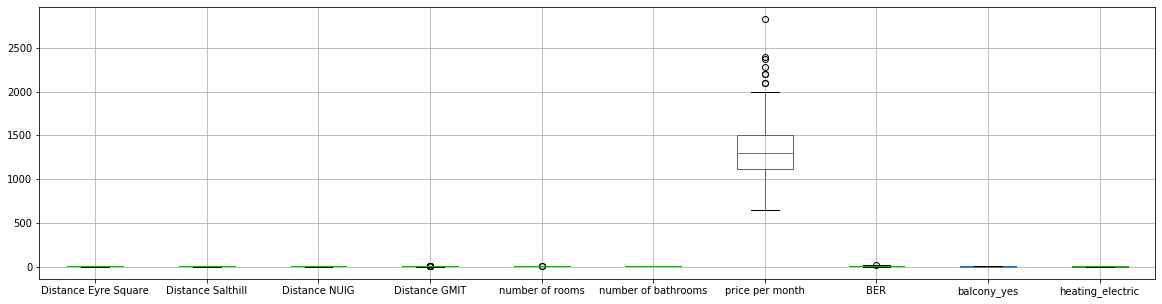

In [24]:
df.boxplot(figsize=(20,5))
plt.show()

In [25]:
scale_mapper = {
    "ground":0,
    "first":1,
    "second":2,
    "third":3,
    "fourth":4,
    "fifth":5
}

df['floor'] = df['floor'].replace(scale_mapper)

df.tail()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,floor,balcony_yes,heating_electric
386,2.638566,4.520756,3.014600,1.751473,1,1,950,10,0,0,1
389,0.991533,1.500987,0.327196,3.504046,2,2,2000,7,2,0,0
392,1.398883,0.528898,1.540958,3.739695,1,1,920,4,0,0,1
393,5.087938,6.748020,5.912348,2.534640,1,1,810,0,1,0,0
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,5,0,0,1


In [26]:
standard_scaler = StandardScaler()
df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms','BER']] = standard_scaler.fit_transform(df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms','BER']])

#can this handle negative values?? not sure might need to use a different method 

In [27]:
df['floor'] = df['floor']/5

In [28]:
y = df['price per month']
X = df.drop('price per month', axis=1).values

#y=y1.to_csv(header=None, index=False)
#X=X1.to_csv(header=None, index=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [29]:
y_test.head()

196     930
201    1400
210    1370
105    1300
273     900
Name: price per month, dtype: int64

In [30]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [31]:
RandomForestRegressor(bootstrap=True, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='gini',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=df.drop('price per month', axis=1).columns).sort_values(ascending=False)
feature_imp

number of rooms         0.330027
Distance NUIG           0.183214
Distance Salthill       0.155156
number of bathrooms     0.080755
Distance Eyre Square    0.066604
Distance GMIT           0.061453
BER                     0.047046
floor                   0.032752
heating_electric        0.028530
balcony_yes             0.014464
dtype: float64

No handles with labels found to put in legend.


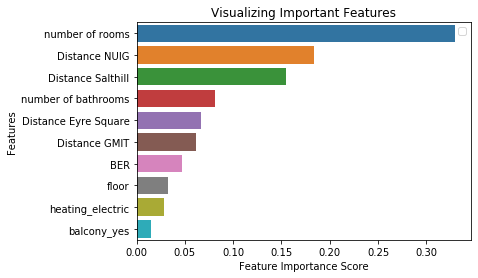

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=350)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("R2:",metrics.r2_score(y_test, y_pred))

R2: 0.5905986761314088


In [35]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss

In [36]:
from sklearn import metrics
print("R2:",metrics.r2_score(y_test, y_pred))
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Square Percentage Error:', rmse(y_test, y_pred))


R2: 0.5905986761314088
Root Mean Squared Error: 217.49969482472954
Root Mean Square Percentage Error: 14.451284019373489


R2: 0.5677830457977167
Mean Absolute Error: 203.86600985221676
Mean Squared Error: 83196.48560056301
Root Mean Squared Error: 288.43800997885666


still not as good as the linear regression in terms of RMSE but the r2 value is slightly higher but still not great 